In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model, preprocessing
%matplotlib inline

df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls", index_col=0)
print df.head(6)

         DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
MouseID                                                                         
309_1    0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
309_2    0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
309_3    0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
309_4    0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
309_5    0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
309_6    0.447506  0.628176  0.367388  2.385939  4.807635  0.218578  0.176233   

         pCAMKII_N   pCREB_N    pELK_N   ...     pCFOS_N     SYP_N  H3AcK18_N  \
MouseID                                  ...                                    
309_1     2.373744  0.232224  1.750936   ...    0.108336  0.427099   0.114783   
309_2     2.292150  0.226972  1.596377   ...    0.104315  0.441581   0.111974   
309_3     2.283337  0.23024

In [2]:
df1 = df.fillna(df.mean())
y = np.unique(np.array(df1['Genotype']), return_inverse=True)[1]

In [3]:
Xs = preprocessing.scale(df1[df1.columns[:-4]])

In [4]:
logreg = linear_model.LogisticRegression()
logreg.fit(Xs,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
yhat = logreg.predict(Xs)
acc = np.mean(yhat == y)
print("Accuracy on training data = %f" % acc)

Accuracy on training data = 0.985185


    ITSN1_N     APP_N   TIAM1_N    TRKA_N    NUMB_N    CaNA_N    SOD1_N  \
0  3.088867  3.009307  2.072864  1.912327  1.005747  0.990545  0.904381   

    DSCR1_N   PKCA_N   pNR2B_N    ...      pNR1_N  pPKCAB_N    pRSK_N  \
0  0.894651  0.88913  0.882376    ...    -1.03287 -1.041956 -1.046966   

   CAMKII_N   AMPKA_N    MTOR_N     SYP_N    BRAF_N    ELK_N     ERK_N  
0 -1.083391 -1.127437 -1.177626 -1.254255 -1.539052 -1.88437 -2.661209  

[1 rows x 77 columns]


<Container object of 3 artists>

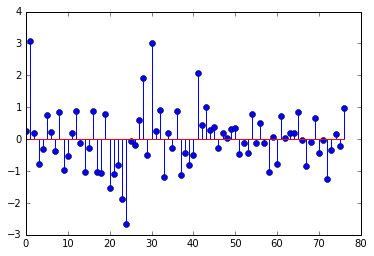

In [6]:
weights = pd.DataFrame(columns = df1.columns[:-4].values)
weights.loc[0] = logreg.coef_[0]
print weights.sort_values(by=0, axis=1, ascending=False)
#ITSN1_N and APP_N has the highest magnitudes with 3.088867 and 3.009307 respectively.
plt.stem(weights.loc[0])

In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils import shuffle
nfold = 10
kf = KFold(n_splits=nfold)
prec = []
rec = []
f1 = []
for train, test in kf.split(Xs):  
    # Get training and test data
    Xtr = Xs[train,:]
    ytr = y[train]
    Xts = Xs[test,:]
    yts = y[test]

    # Fit a model
    logreg.fit(Xtr, ytr)
    yhat = logreg.predict(Xts)

    # Measure performance
    preci,reci,f1i,_= precision_recall_fscore_support(yts,yhat,average="binary") 
    prec.append(preci)
    rec.append(reci)
    f1.append(f1i)
    Xs= shuffle(Xs,random_state=0)

# Take average values of the metrics
precm = np.mean(prec)
recm = np.mean(rec)
f1m = np.mean(f1)

# Compute the standard errors
prec_se = np.std(prec)/np.sqrt(nfold-1)
rec_se = np.std(rec)/np.sqrt(nfold-1)
f1_se = np.std(f1)/np.sqrt(nfold-1)

print('Precision = {0:.4f}, SE={1:.4f}'.format(precm,prec_se))
print('Recall =    {0:.4f}, SE={1:.4f}'.format(recm, rec_se))
print('f1 =        {0:.4f}, SE={1:.4f}'.format(f1m, f1_se))

C:\Users\nadjatee\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Precision = 0.4725, SE=0.1596
Recall =    0.1307, SE=0.0466
f1 =        0.1997, SE=0.0688


In [8]:
y = np.unique(np.array(df1['class']), return_inverse=True)[1]

In [9]:
logreg = linear_model.LogisticRegression(C=1e5,class_weight="balanced")
logreg.fit(Xs,y)

LogisticRegression(C=100000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [10]:
yhat = logreg.predict(Xs)
acc = np.mean(yhat == y)
print("Accuracy on training data = %f" % acc)

Accuracy on training data = 0.312963


In [11]:
from sklearn.metrics import confusion_matrix
from operator import add
nfold = 10
kf = KFold(n_splits=nfold)
prec = []
rec = []
f1 = []
conf = np.zeros((8,8))
for train, test in kf.split(Xs):  
    # Get training and test data
    Xtr = Xs[train,:]
    ytr = y[train]
    Xts = Xs[test,:]
    yts = y[test]

    # Fit a model
    logreg.fit(Xtr, ytr)
    yhat = logreg.predict(Xts)

    # Measure performance
    preci,reci,f1i,_= precision_recall_fscore_support(yts,yhat) 
    try:
        conf =  map(add, conf, confusion_matrix(yts, yhat))
    except:
        pass
    prec.append(preci)
    rec.append(reci)
    Xs= shuffle(Xs,random_state=0)
# Take average values of the metrics
precm = np.mean(prec)
recm = np.mean(rec)
f1m = np.mean(f1)
confm = np.mean(conf)

# Compute the standard errors
prec_se = np.std(prec)/np.sqrt(nfold-1)
rec_se = np.std(rec)/np.sqrt(nfold-1)
f1_se = np.std(f1)/np.sqrt(nfold-1)
conf_se = np.std(conf)/np.sqrt(nfold-1)

print('Precision = {0:.4f}, SE={1:.4f}'.format(precm,prec_se))
print('Recall =    {0:.4f}, SE={1:.4f}'.format(recm, rec_se))
print('f1 =        {0:.4f}, SE={1:.4f}'.format(f1m, f1_se))
print('ConfusionM= {0:.4f}, SE={1:.4f}'.format(confm, conf_se))
conf = preprocessing.scale(conf)
print(np.array_str(conf, precision=4, suppress_small=True))

C:\Users\nadjatee\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Precision = 0.1216, SE=0.0933
Recall =    0.0223, SE=0.0161
f1 =        nan, SE=nan
ConfusionM= 16.8750, SE=1.6378
[[-0.1419  1.525  -0.7597  1.4377  1.4611 -0.3173 -0.7586  0.4615]
 [ 2.1284  0.     -0.5346 -0.5154 -1.2216  2.0256  0.8597 -1.0769]
 [-0.5203 -0.915   0.1407  0.1356  0.8862 -0.3173  0.8597  2.    ]
 [-0.1419  0.      0.3658 -1.3834  0.3114 -0.3173  0.0506  0.7692]
 [-0.1419  0.915  -0.9848 -0.2984  0.1198 -0.122   1.6689 -0.1538]
 [ 0.6149 -1.525  -0.0844 -0.9494 -0.6467 -1.4887 -1.5677 -1.0769]
 [-1.6554 -0.915  -0.5346  1.6547  0.6946  1.0494 -0.354  -0.9231]
 [-0.1419  0.915   2.3918 -0.0814 -1.6048 -0.5125 -0.7586  0.    ]]


C:\Users\nadjatee\Anaconda2\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\nadjatee\Anaconda2\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\nadjatee\Anaconda2\lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
C:\Users\nadjatee\Anaconda2\lib\site-packages\numpy\core\_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\nadjatee\Anaconda2\lib\site-packages\numpy\core\_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[-0.5264 -2.1231 -0.1963 -0.467  -0.3325  0.0628 -0.2466 -0.0717  0.0946
  0.1215  0.111  -0.1026  0.107   0.3793  0.1573  0.3047  0.0919  0.4391
 -0.2467  0.0926  1.4434  0.2179 -0.4705 -0.0683 -0.6571  0.647  -0.0583
  0.4185  0.0294 -0.1234  0.3223  0.3047  0.1545 -0.4873 -0.0311 -0.3579
  0.1523  0.2365 -0.1441  0.3069 -0.3916  0.3259  0.0295  0.5143 -0.0179
  0.2539 -0.2818 -0.14   -0.234   0.283  -0.2585 -0.0771 -0.2706 -0.0716
 -0.2363  0.3482  0.3005 -0.1286  0.0949 -0.018   0.5576 -0.0687 -0.4897
 -0.1594 -0.0362  0.0778  0.3239 -0.2136 -0.3091 -0.0159 -0.0716  0.0848
  0.1734 -0.0011 -0.0001  0.2616 -0.3139]
[ 0.1651  0.6714  0.0811 -1.3536 -0.2419 -0.0279  0.0661  0.2903  0.527
  0.2449  0.0064  0.4383 -0.1043 -0.2656  0.5478 -0.6322  1.4263  0.1589
 -0.0202  0.271  -0.8772 -0.0444  0.0623 -1.2251  0.1397  0.1322 -0.0553
 -0.0794 -1.5093  0.2412 -0.0417  0.8984  0.0501  0.0616  0.3341 -0.1641
 -0.5516  0.9444  0.2825 -0.2541 -0.3257 -0.0045 -0.0753 -0.2353 -0.3236
 -0.7134  

<Container object of 3 artists>

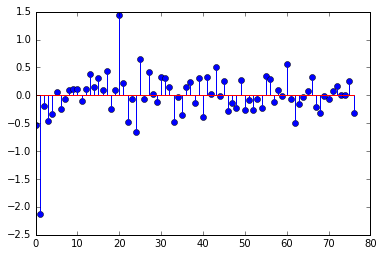

In [12]:
weights = pd.DataFrame(columns = df1.columns[:-4].values, data = logreg.coef_)
for index,row in weights.iterrows():
    print (np.array_str(row, precision=4, suppress_small=True))
plt.stem(weights.loc[0])